In [ ]:
!pip install karateclub

Number of nodes (club-members) 34


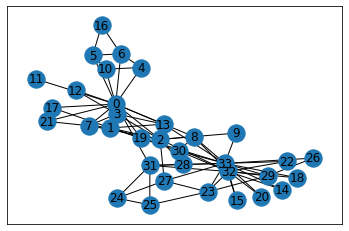

In [12]:
import networkx as nx
from karateclub import DeepWalk 
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


G = nx.karate_club_graph() 
print('Number of nodes (club-members)', len(G.nodes))
nx.draw_networkx(G)


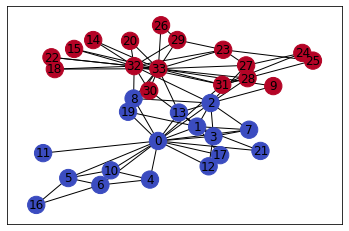

In [14]:
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = layout_pos ,node_color = labels, cmap='coolwarm')


In [26]:
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) #Clubs: 'john H' or 'Mr.Hi'
    

" Perform node embedding using DeepWalk "
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape)

Embedding array shape (nodes x features): (34, 124)


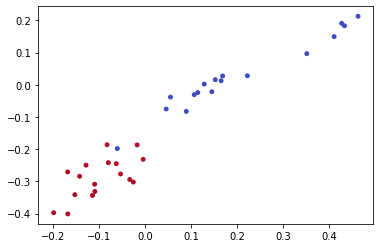

In [23]:
" Embedding in higher dimestion "
plt.scatter(embedding[:,0],embedding[:,1],c=labels,
            s=15,cmap='coolwarm')

Low dimensional embedding representaiton (nodes x 2): (34, 2)


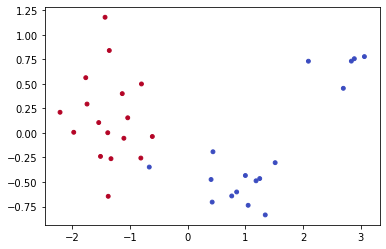

In [24]:
PCA_model = sklearn.decomposition.PCA(n_components=2) 
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],c=labels,
            s=15,cmap='coolwarm')


In [29]:
" Node classification using embedded model"
x_train,x_test,y_train,y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print('AUC:',ML_acc)

AUC: 0.9285714285714286
